<a href="https://colab.research.google.com/github/delonfadhil/MachineLearningTasks/blob/main/6thWeekTasks/Clustering%20SKLearn/9_Clustering_performance_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fadhil Dzikri Aqila

NIM : 1103213136

Scikit-learn.org [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

#2.3.11. Clustering performance evaluation

##[Adjustment for chance in clustering performance evaluation:](https://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) Analysis of the impact of the dataset size on the value of clustering measures for random assignments.

###Defining the list of metrics to evaluate

In [1]:
from sklearn import metrics

score_funcs = [
    ("V-measure", metrics.v_measure_score),
    ("Rand index", metrics.rand_score),
    ("ARI", metrics.adjusted_rand_score),
    ("MI", metrics.mutual_info_score),
    ("NMI", metrics.normalized_mutual_info_score),
    ("AMI", metrics.adjusted_mutual_info_score),
]

###First experiment: fixed ground truth labels and growing number of clusters

In [2]:
import numpy as np

rng = np.random.RandomState(0)


def random_labels(n_samples, n_classes):
    return rng.randint(low=0, high=n_classes, size=n_samples)

In [3]:
def fixed_classes_uniform_labelings_scores(
    score_func, n_samples, n_clusters_range, n_classes, n_runs=5
):
    scores = np.zeros((len(n_clusters_range), n_runs))
    labels_a = random_labels(n_samples=n_samples, n_classes=n_classes)

    for i, n_clusters in enumerate(n_clusters_range):
        for j in range(n_runs):
            labels_b = random_labels(n_samples=n_samples, n_classes=n_clusters)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

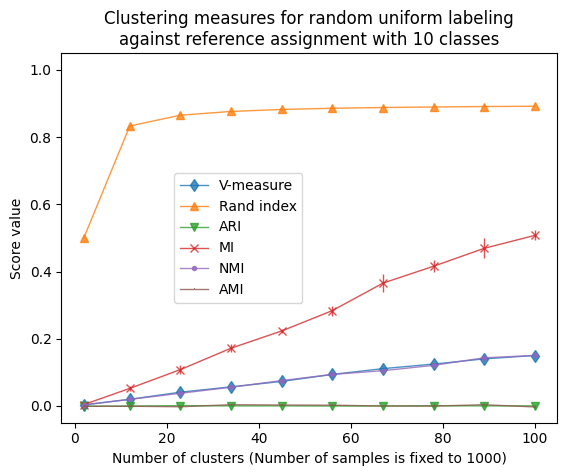

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = 1000
n_classes = 10
n_clusters_range = np.linspace(2, 100, 10).astype(int)
plots = []
names = []

sns.color_palette("colorblind")
plt.figure(1)

for marker, (score_name, score_func) in zip("d^vx.,", score_funcs):
    scores = fixed_classes_uniform_labelings_scores(
        score_func, n_samples, n_clusters_range, n_classes=n_classes
    )
    plots.append(
        plt.errorbar(
            n_clusters_range,
            scores.mean(axis=1),
            scores.std(axis=1),
            alpha=0.8,
            linewidth=1,
            marker=marker,
        )[0]
    )
    names.append(score_name)

plt.title(
    "Clustering measures for random uniform labeling\n"
    f"against reference assignment with {n_classes} classes"
)
plt.xlabel(f"Number of clusters (Number of samples is fixed to {n_samples})")
plt.ylabel("Score value")
plt.ylim(bottom=-0.05, top=1.05)
plt.legend(plots, names, bbox_to_anchor=(0.5, 0.5))
plt.show()

###Second experiment: varying number of classes and clusters

In [5]:
def uniform_labelings_scores(score_func, n_samples, n_clusters_range, n_runs=5):
    scores = np.zeros((len(n_clusters_range), n_runs))

    for i, n_clusters in enumerate(n_clusters_range):
        for j in range(n_runs):
            labels_a = random_labels(n_samples=n_samples, n_classes=n_clusters)
            labels_b = random_labels(n_samples=n_samples, n_classes=n_clusters)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

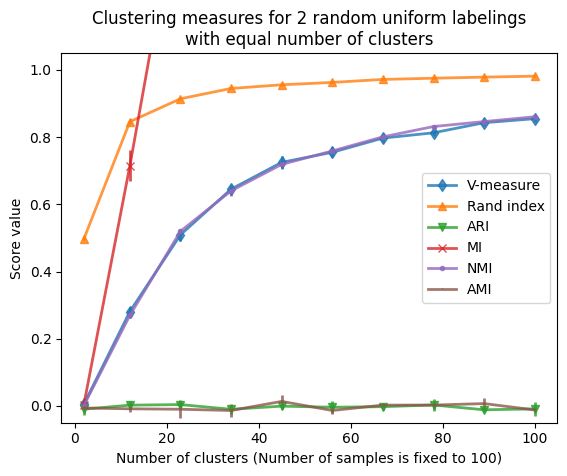

In [6]:
n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(int)

plt.figure(2)

plots = []
names = []

for marker, (score_name, score_func) in zip("d^vx.,", score_funcs):
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    plots.append(
        plt.errorbar(
            n_clusters_range,
            np.median(scores, axis=1),
            scores.std(axis=1),
            alpha=0.8,
            linewidth=2,
            marker=marker,
        )[0]
    )
    names.append(score_name)

plt.title(
    "Clustering measures for 2 random uniform labelings\nwith equal number of clusters"
)
plt.xlabel(f"Number of clusters (Number of samples is fixed to {n_samples})")
plt.ylabel("Score value")
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)
plt.show()

##[Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()